In [4]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns


Loading the Dataset

In [5]:
file_path = "/home/ssariko/Market_Basket_Analysis/Assignment-1_Data.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())


Dataset Preview:
   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   Price  CustomerID         Country  
0   2.55     17850.0  United Kingdom  
1   3.39     17850.0  United Kingdom  
2   2.75     17850.0  United Kingdom  
3   3.39     17850.0  United Kingdom  
4   3.39     17850.0  United Kingdom  


Pre-Processing

In [6]:
# Step 1: Remove missing values
data = data.dropna(subset=['Itemname', 'BillNo', 'Quantity'])

# Step 2: Remove invalid transactions (e.g., Quantity <= 0)
data = data[data['Quantity'] > 0]

# Step 3: Check and remove duplicates
data = data.drop_duplicates()

# Display the cleaned dataset's shape
print(f"Dataset shape after cleaning: {data.shape}")

# Display the cleaned dataset
print("Cleaned Dataset Preview:")
print(data.head())

# Step 4: Group transactions by BillNo and Itemname to create a matrix
basket = data.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().reset_index().fillna(0)

# Step 5: Convert quantities into binary format (1 if purchased, 0 otherwise)
basket = basket.set_index('BillNo')  # Set BillNo as index
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Display the transformed basket
print("Transformed Basket (Binary):")
print(basket.head())

Dataset shape after cleaning: (514850, 7)
Cleaned Dataset Preview:
   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00   
3  536365  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00   
4  536365       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00   

   Price  CustomerID         Country  
0   2.55     17850.0  United Kingdom  
1   3.39     17850.0  United Kingdom  
2   2.75     17850.0  United Kingdom  
3   3.39     17850.0  United Kingdom  
4   3.39     17850.0  United Kingdom  
Transformed Basket (Binary):
Itemname  *Boombox Ipod Classic  *USB Office Mirror Ball  \
BillNo                                                     
536365                        0                        0   
536366   

Exploratory Data Analysis

1- Total Transactions, Unique Items, and Average Items per Transaction

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

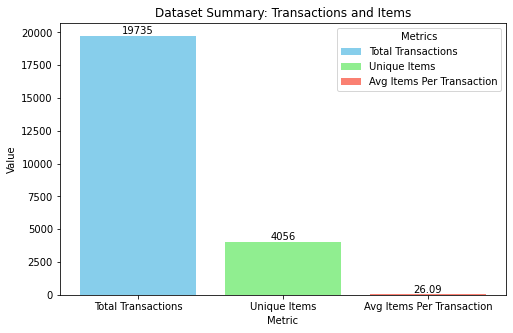

In [8]:
# Total Transactions
total_transactions = data['BillNo'].nunique()

# Total Unique Items
total_items = data['Itemname'].nunique()

# Average Items Per Transaction
avg_items_per_transaction = data.groupby('BillNo')['Itemname'].count().mean()

# Prepare Data for Visualization
metrics = ['Total Transactions', 'Unique Items', 'Avg Items Per Transaction']
values = [total_transactions, total_items, avg_items_per_transaction]

# Create a DataFrame for clarity
metrics_df = pd.DataFrame({'Metric': metrics, 'Value': values})

# Plot Vertical Bar Chart with Legend
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_df['Metric'], metrics_df['Value'], color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Value')
plt.xlabel('Metric')
plt.title('Dataset Summary: Transactions and Items')

# Add value labels on the bars
for index, value in enumerate(values):
    plt.text(index, value, f"{value:.2f}" if isinstance(value, float) else str(value), ha='center', va='bottom')

# Add Legend
colors = ['skyblue', 'lightgreen', 'salmon']
labels = ['Total Transactions', 'Unique Items', 'Avg Items Per Transaction']
plt.legend(bars, labels, loc='upper right', title="Metrics")

plt.show()



2- Top-Selling Items

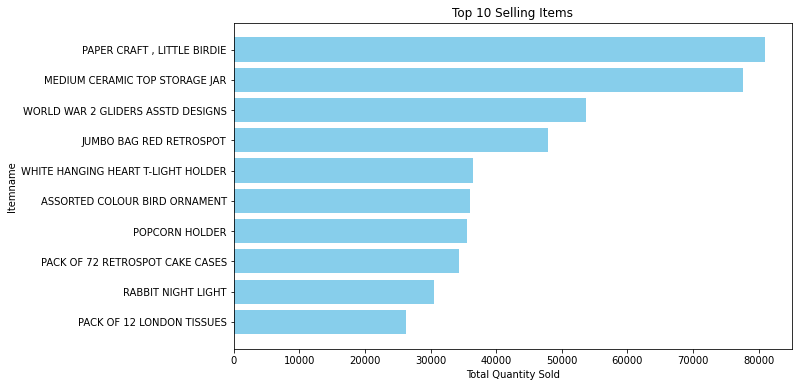

In [9]:
# Calculate Top-Selling Items
top_n = 10  # Number of top items to display
top_selling_items = data.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False).head(top_n)

# Prepare Data for Visualization
top_selling_df = top_selling_items.reset_index()
top_selling_df.columns = ['Itemname', 'Total Quantity']

# Plot Horizontal Bar Chart for Top-Selling Items
plt.figure(figsize=(10, 6))
plt.barh(top_selling_df['Itemname'], top_selling_df['Total Quantity'], color='skyblue')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Itemname')
plt.title(f'Top {top_n} Selling Items')
plt.gca().invert_yaxis()  
plt.show()


3- Hourly Shopping Analysis

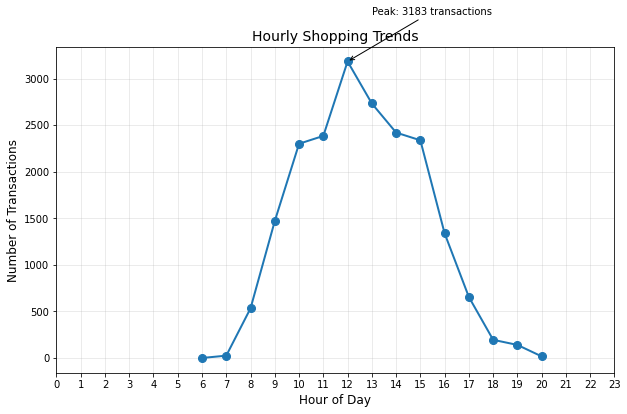

In [10]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract the hour from the 'Date' column
data['Hour'] = data['Date'].dt.hour

# Group by hour and count the number of transactions
hourly_data = data.groupby('Hour')['BillNo'].nunique()  

# Plot Hourly Trends with Enhanced Visuals
plt.figure(figsize=(10, 6))

# Use a distinct color and adjust line width and marker style
plt.plot(hourly_data.index, hourly_data.values, marker='o', color='#1f77b4', linewidth=2, linestyle='-', markersize=8)

# Add annotations for the peak hour
peak_hour = hourly_data.idxmax()
peak_transactions = hourly_data.max()
plt.annotate(f'Peak: {peak_transactions} transactions', 
             xy=(peak_hour, peak_transactions), 
             xytext=(peak_hour + 1, peak_transactions + 500),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=10)

plt.xticks(range(0, 24))

# Labels and title
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title('Hourly Shopping Trends', fontsize=14)

# Add grid for better readability
plt.grid(alpha=0.3)
plt.show()



4- Day-of-Week Analysis

posx and posy should be finite values
posx and posy should be finite values


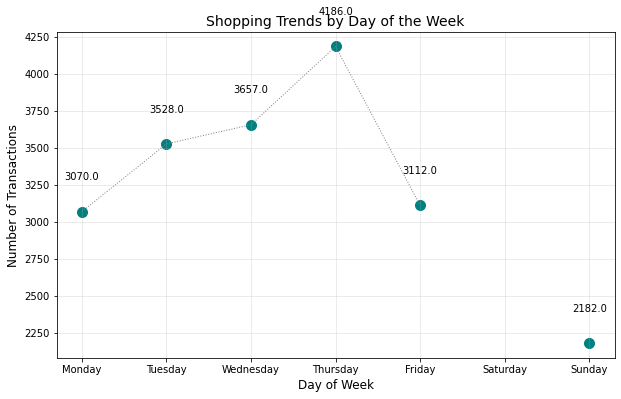

In [11]:
# Extract day of the week from the 'Date' column
data['DayOfWeek'] = data['Date'].dt.day_name()

# Group by day of the week and count unique transactions
day_of_week_data = data.groupby('DayOfWeek')['BillNo'].nunique()

# Reorder to ensure days are in calendar order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_data = day_of_week_data.reindex(ordered_days)

# Plot Day-of-Week Trends with Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(day_of_week_data.index, day_of_week_data.values, color='teal', s=100)
plt.plot(day_of_week_data.index, day_of_week_data.values, color='gray', linestyle='dotted', linewidth=1)

# Adding annotations for each point
for index, value in enumerate(day_of_week_data.values):
    plt.text(index, value + 200, str(value), ha='center', va='bottom', fontsize=10)

# Customize Labels and Title
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title('Shopping Trends by Day of the Week', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


5- Combined Temporal Heatmap

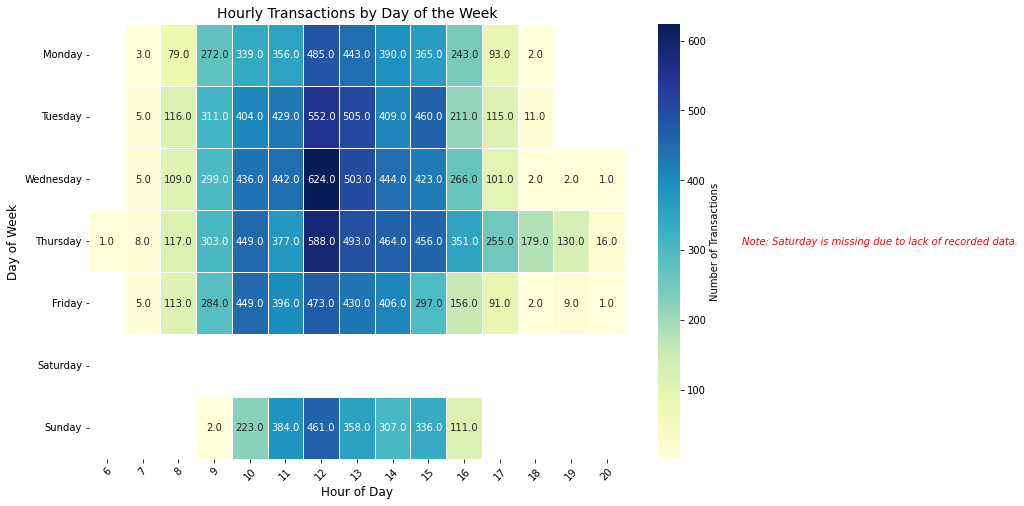

In [12]:
# Group by Day of Week and Hour of Day
heatmap_data = data.groupby(['DayOfWeek', 'Hour'])['BillNo'].nunique().unstack()

# Reorder the days of the week
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(index=ordered_days)

# Plot Heatmap with Annotation for Missing Saturday Data
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5, cbar_kws={'label': 'Number of Transactions'})

# Add title and labels
plt.title('Hourly Transactions by Day of the Week', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add annotation text
plt.text(26, 3.5, 'Note: Saturday is missing due to lack of recorded data.', 
         fontsize=10, color='red', ha='right', va='center', style='italic')

plt.show()

6- Monthly Shopping Trends

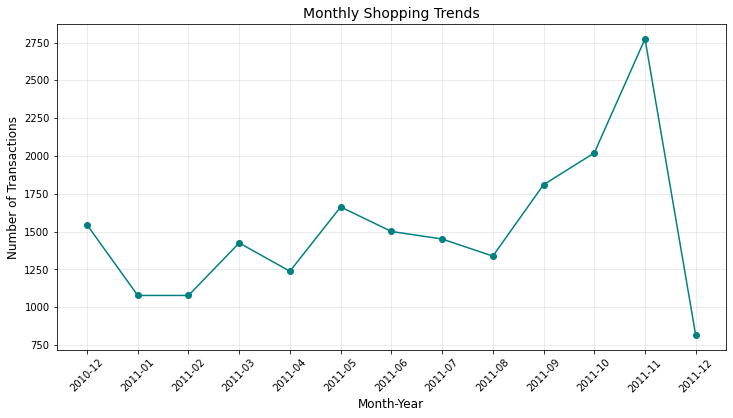

In [13]:
# Extract the month and year from the 'Date' column
data['MonthYear'] = data['Date'].dt.to_period('M')

# Group by Month-Year and count unique transactions
monthly_data = data.groupby('MonthYear')['BillNo'].nunique()

# Reset index for plotting
monthly_data = monthly_data.reset_index()
monthly_data['MonthYear'] = monthly_data['MonthYear'].astype(str)

# Plot Monthly Trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['MonthYear'], monthly_data['BillNo'], marker='o', linestyle='-', color='teal')
plt.title('Monthly Shopping Trends', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


7-  Item co-occurrence analysis

In [14]:
!pip install mlxtend



Defaulting to user installation because normal site-packages is not writeable


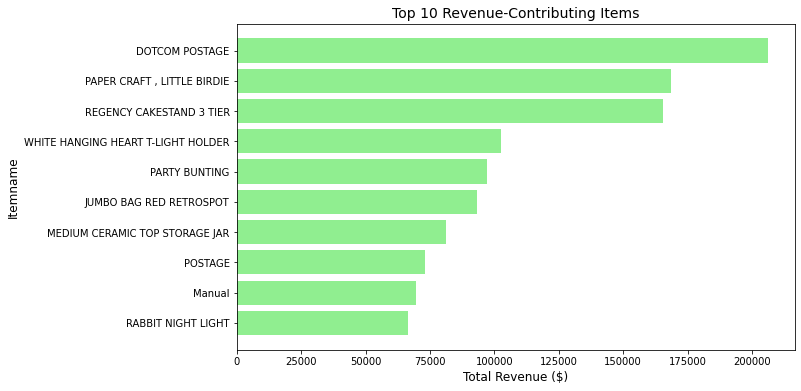

In [15]:
# Import necessary libraries for additional analysis
from mlxtend.frequent_patterns import apriori, association_rules

# Step 6: Revenue Analysis
# Add a 'Revenue' column
data['Revenue'] = data['Quantity'] * data['Price']

# Calculate total revenue by item
item_revenue = data.groupby('Itemname')['Revenue'].sum().sort_values(ascending=False).head(10)

# Prepare data for visualization
item_revenue_df = item_revenue.reset_index()
item_revenue_df.columns = ['Itemname', 'Total Revenue']

# Plot the top revenue-contributing items
plt.figure(figsize=(10, 6))
plt.barh(item_revenue_df['Itemname'], item_revenue_df['Total Revenue'], color='lightgreen')
plt.xlabel('Total Revenue ($)', fontsize=12)
plt.ylabel('Itemname', fontsize=12)
plt.title('Top 10 Revenue-Contributing Items', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

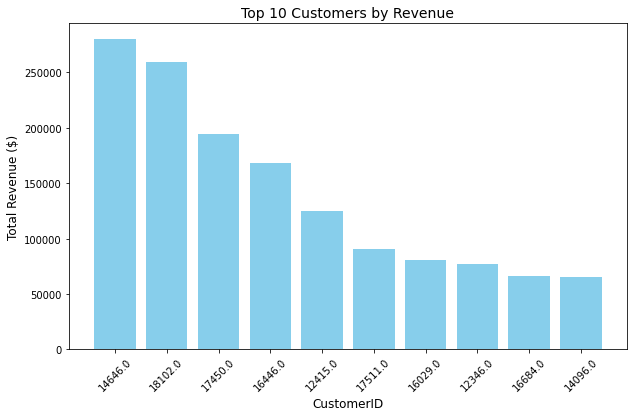

In [16]:
#Step 7: Customer Analysis
# Calculate total revenue per customer
customer_revenue = data.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)

# Prepare data for visualization
customer_revenue_df = customer_revenue.reset_index()
customer_revenue_df.columns = ['CustomerID', 'Total Revenue']

# Plot the top customers by revenue
plt.figure(figsize=(10, 6))
plt.bar(customer_revenue_df['CustomerID'].astype(str), customer_revenue_df['Total Revenue'], color='skyblue')
plt.xlabel('CustomerID', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.title('Top 10 Customers by Revenue', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [17]:
# Import necessary libraries
from itertools import combinations
from collections import Counter
from sklearn.neighbors import NearestNeighbors

# Function to get frequent pairs of items bought together
def get_frequent_pairs(basket, min_support=0.01):
    item_pairs = []
    for _, row in basket.iterrows():
        items = row[row == 1].index.tolist()
        item_pairs.extend(combinations(items, 2))
    
    # Count pairs and filter by support
    pair_counts = Counter(item_pairs)
    total_transactions = basket.shape[0]
    frequent_pairs = {pair: count / total_transactions for pair, count in pair_counts.items() if count / total_transactions >= min_support}
    
    return frequent_pairs

# Prepare the basket data for association rules
top_50_items = data.groupby('Itemname')['Quantity'].sum().sort_values(ascending=False).head(50).index
filtered_data = data[data['Itemname'].isin(top_50_items)]

# Convert data into a binary basket matrix (for top 50 items)
basket_filtered = filtered_data.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().reset_index().fillna(0)
basket_filtered = basket_filtered.set_index('BillNo')
basket_filtered = basket_filtered.applymap(lambda x: 1 if x > 0 else 0)

# Get frequent pairs of items
frequent_pairs_filtered = get_frequent_pairs(basket_filtered, min_support=0.01)
print("\n**Top Frequent Item Pairs:**")
for pair, support in list(frequent_pairs_filtered.items())[:10]:
    print(f"{pair}: {support:.2%} support")

# Prepare data for recommendation system (using nearest neighbors)
item_features_filtered = basket_filtered.T  # Items as rows, transactions as columns
nbrs_filtered = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(item_features_filtered)

# Function to recommend similar items for a given item
def recommend_similar_items(itemname, n_recommendations=5):
    item_index = item_features_filtered.index.get_loc(itemname)
    distances, indices = nbrs_filtered.kneighbors([item_features_filtered.iloc[item_index]])
    recommended_items = item_features_filtered.index[indices.flatten()].tolist()
    return recommended_items

# Example: Get recommendations for a popular item
sample_item_filtered = 'WHITE HANGING HEART T-LIGHT HOLDER' if 'WHITE HANGING HEART T-LIGHT HOLDER' in item_features_filtered.index else item_features_filtered.index[0]
print(f"\n**Recommendations for {sample_item_filtered}:**")
recommendations = recommend_similar_items(sample_item_filtered)
for i, rec_item in enumerate(recommendations, 1):
    print(f"{i}. {rec_item}")


**Top Frequent Item Pairs:**
('RED TOADSTOOL LED NIGHT LIGHT', 'SPACEBOY LUNCH BOX'): 1.34% support
('60 TEATIME FAIRY CAKE CASES', 'JUMBO STORAGE BAG SUKI'): 1.01% support
('60 TEATIME FAIRY CAKE CASES', 'LUNCH BAG RED RETROSPOT'): 1.40% support
('60 TEATIME FAIRY CAKE CASES', 'PACK OF 60 PINK PAISLEY CAKE CASES'): 2.59% support
('60 TEATIME FAIRY CAKE CASES', 'PACK OF 72 RETROSPOT CAKE CASES'): 3.34% support
('JUMBO  BAG BAROQUE BLACK WHITE', 'JUMBO BAG PINK POLKADOT'): 3.16% support
('JUMBO  BAG BAROQUE BLACK WHITE', 'JUMBO STORAGE BAG SUKI'): 3.23% support
('JUMBO  BAG BAROQUE BLACK WHITE', 'LUNCH BAG RED RETROSPOT'): 1.98% support
('JUMBO  BAG BAROQUE BLACK WHITE', 'PACK OF 72 RETROSPOT CAKE CASES'): 1.06% support
('JUMBO BAG PINK POLKADOT', 'JUMBO STORAGE BAG SUKI'): 3.94% support

**Recommendations for WHITE HANGING HEART T-LIGHT HOLDER:**
1. WHITE HANGING HEART T-LIGHT HOLDER
2. GIRLS ALPHABET IRON ON PATCHES
3. PAPER CRAFT , LITTLE BIRDIE
4. ASSTD DESIGN 3D PAPER STICKERS
5. 

In [21]:
!pip install annoy


Defaulting to user installation because normal site-packages is not writeable
  Using cached annoy-1.17.3.tar.gz (647 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [22 lines of output]
      /opt/sw/spack/apps/linux-rhel8-x86_64_v2/gcc-10.3.0/python-3.9.9-jh/lib/python3.9/site-packages/setuptools/installer.py:27: SetuptoolsDeprecationWarning: setuptools.installer is deprecated. Requirements should be satisfied by a PEP 517 installer.
        warnings.warn(
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-3.9
      creating build/lib.linux-x86_64-3.9/annoy
      copying annoy/__init__.py -> build/lib.linux-x86_64-3.9/annoy
      copying annoy/__init__.pyi -> build/lib.linux-x86_64-3.9/annoy
      copying annoy/py.typed -> build/lib.linux-x86_64-3.9/annoy
      running build_ext
      buildi

In [20]:
# Import necessary libraries
from annoy import AnnoyIndex
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Nearest Neighbors Recommendation (Baseline)
def recommend_with_baseline(itemname, n_recommendations=5):
    item_index = item_features_filtered.index.get_loc(itemname)
    distances, indices = nbrs_filtered.kneighbors([item_features_filtered.iloc[item_index]])
    recommended_items = item_features_filtered.index[indices.flatten()].tolist()
    return recommended_items

# Step 2: Annoy Recommendation System (Approximate Nearest Neighbors)
def build_annoy_index(n_trees=10):
    n_features = item_features_filtered.shape[1]
    annoy_index = AnnoyIndex(n_features, 'angular')
    for i in range(item_features_filtered.shape[0]):
        annoy_index.add_item(i, item_features_filtered.iloc[i].values)
    annoy_index.build(n_trees)
    return annoy_index

# Build Annoy index with 10 trees for better balance of speed and accuracy
annoy_index = build_annoy_index(n_trees=10)

def recommend_with_annoy(itemname, n_recommendations=5):
    item_index = item_features_filtered.index.get_loc(itemname)
    nearest_indices = annoy_index.get_nns_by_item(item_index, n_recommendations)
    return item_features_filtered.index[nearest_indices].tolist()

# Step 3: Comparison of Algorithms
sample_item = 'WHITE HANGING HEART T-LIGHT HOLDER' if 'WHITE HANGING HEART T-LIGHT HOLDER' in item_features_filtered.index else item_features_filtered.index[0]

print(f"\n**Baseline Nearest Neighbors Recommendations for {sample_item}:**")
baseline_recommendations = recommend_with_baseline(sample_item)
for i, rec in enumerate(baseline_recommendations, 1):
    print(f"{i}. {rec}")

print(f"\n**Annoy Approximate Nearest Neighbors Recommendations for {sample_item}:**")
annoy_recommendations = recommend_with_annoy(sample_item)
for i, rec in enumerate(annoy_recommendations, 1):
    print(f"{i}. {rec}")

ModuleNotFoundError: No module named 'annoy'

NameError: name 'frequent_itemsets' is not defined

<class 'frozenset'>


mlxtend version: 0.23.3


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

    support                               itemsets  num_itemsets
0  0.015809               (10 COLOUR SPACEBOY PEN)             1
1  0.012567      (12 MESSAGE CARDS WITH ENVELOPES)             1
2  0.017887        (12 PENCIL SMALL TUBE WOODLAND)             1
3  0.018242  (12 PENCILS SMALL TUBE RED RETROSPOT)             1
4  0.017887          (12 PENCILS SMALL TUBE SKULL)             1
support         float64
itemsets         object
num_itemsets      int64
dtype: object
<class 'frozenset'>


    support                               itemsets  num_itemsets  num_items
0  0.015809               (10 COLOUR SPACEBOY PEN)             1          1
1  0.012567      (12 MESSAGE CARDS WITH ENVELOPES)             1          1
2  0.017887        (12 PENCIL SMALL TUBE WOODLAND)             1          1
3  0.018242  (12 PENCILS SMALL TUBE RED RETROSPOT)             1          1
4  0.017887          (12 PENCILS SMALL TUBE SKULL)             1          1
Index(['support', 'itemsets', 'num_itemsets', 'num_items'], dtype='object')


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

/home/ssariko/.local/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'